## Nomor 1 dan 2

In [1]:
%pip install librosa
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


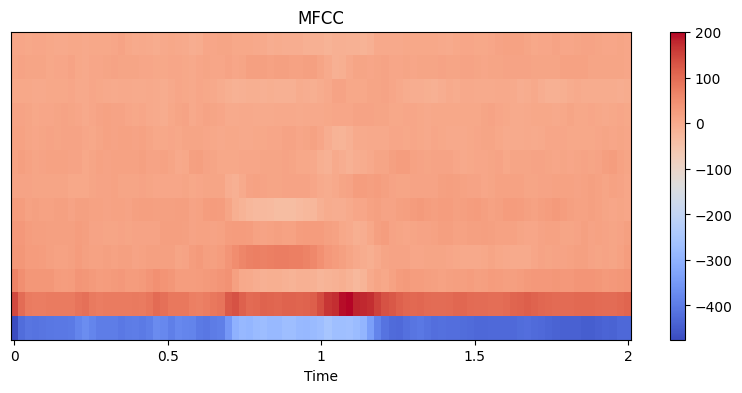

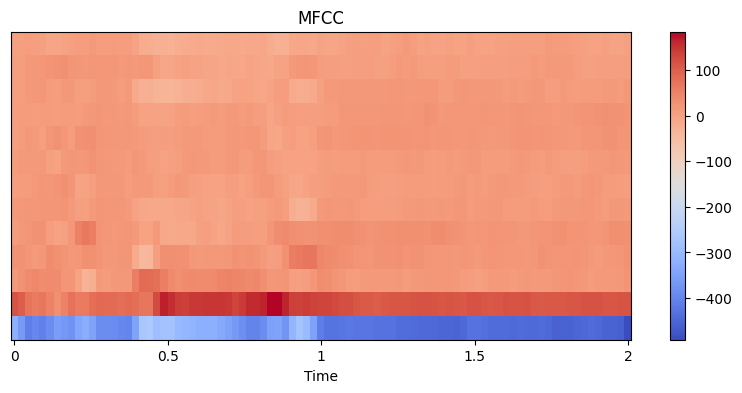

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 1. Membaca file audio
audio_path = './training/merah/1.wav'
y, sr = librosa.load(audio_path)

# 2. Menghitung MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 3. Menampilkan plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


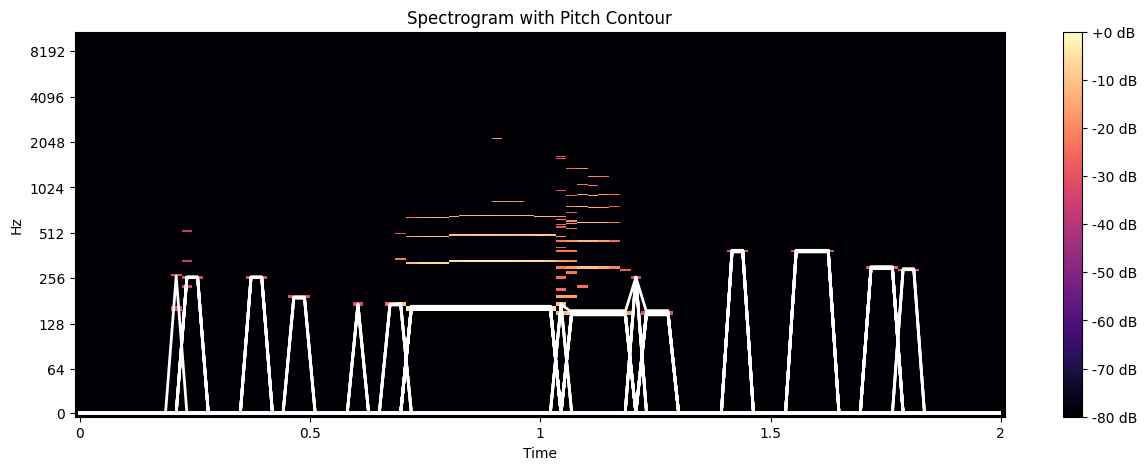

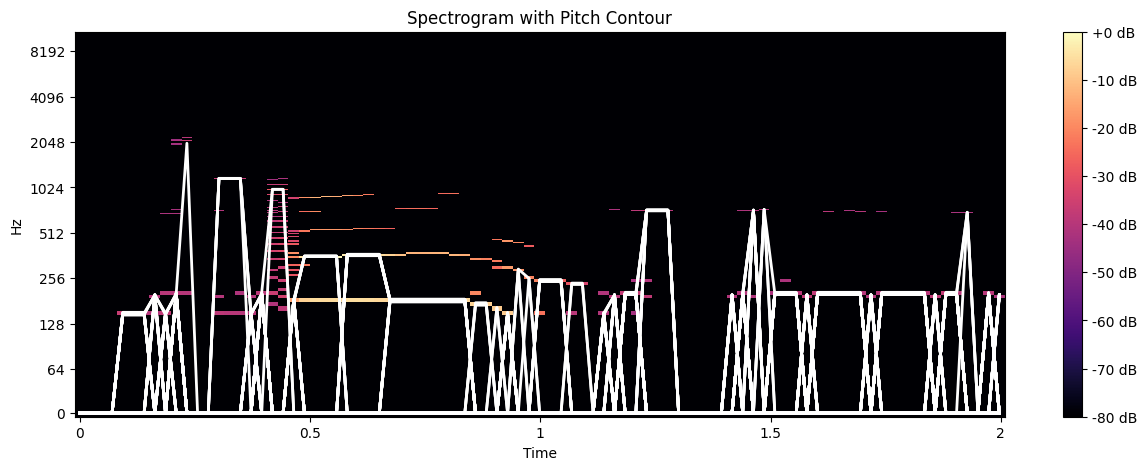

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def Spectrogram(audio_path):
  # 1. Membaca file audio
  y, sr = librosa.load(audio_path)

  # 2. Mengekstrak kurva nada (pitch contour) menggunakan fungsi piptrack
  #    (perlu diperhatikan bahwa ini bukan pitch yang sama dengan frekuensi fundamental)
  frequencies, D = librosa.core.piptrack(y=y, sr=sr)

  # Mengambil indeks frekuensi maksimum untuk setiap frame
  pitch_idx = np.argmax(D, axis=0)

  # Mengambil frekuensi yang sesuai dengan indeks maksimum
  pitch_freqs = frequencies[pitch_idx]

  # 3. Menampilkan grafik kurva nada
  times = librosa.times_like(pitch_freqs)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', sr=sr)
  plt.plot(times, pitch_freqs, label='Pitch (Hz)', color='w', linewidth=2)
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spectrogram with Pitch Contour')
  plt.show()

Spectrogram("./training/merah/1.wav")
Spectrogram("./training/kuning/1.wav")
